### Text Classification with NLP on Research Articles


**Anggota kelompok:**
- Aurellia Vieryn			2440066626
- Vieren Cristian			2440102202
- Aditya Chandi Nugroho 	2440053011

In [ ]:
# 1. Melakukan Analisa sederhana terhadap data
# 2. Data Preprocessing
# 3. Vectorization process
# 4. Modelling and Experimentation
# 5. Evaluation
# 6. Documentation

#### Data Visualization

Import train dataset dan test dataset kepada dua variabel yang berbeda:

In [ ]:
import pandas as pd
articles_train = pd.read_csv('train.csv')
articles_test = pd.read_csv('test.csv')

In [ ]:
articles_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20972 entries, 0 to 20971
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    20972 non-null  int64 
 1   TITLE                 20972 non-null  object
 2   ABSTRACT              20972 non-null  object
 3   Computer Science      20972 non-null  int64 
 4   Physics               20972 non-null  int64 
 5   Mathematics           20972 non-null  int64 
 6   Statistics            20972 non-null  int64 
 7   Quantitative Biology  20972 non-null  int64 
 8   Quantitative Finance  20972 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 1.4+ MB


Dalam train dataset ini berisikan data sebanyak 20972 data dan 9 variabel.

In [ ]:
articles_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8989 entries, 0 to 8988
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        8989 non-null   int64 
 1   TITLE     8989 non-null   object
 2   ABSTRACT  8989 non-null   object
dtypes: int64(1), object(2)
memory usage: 210.8+ KB


Dalam test dataset berisikan data sebanyak 8989 data dan terdapat 3 variabel. Dari kedua informasi dataset yang didapatkan di atas, dapat disimpulkan bahwa dataset tidak ada missing value.

In [ ]:
articles_train.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [ ]:
articles_test.head()

,ID,TITLE,ABSTRACT
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...


Terdapat 6 kolom pada dataset train yang menunjukkan 6 kategori klasifikasi dari teksnya. Namun, pada testing dataset tidak terdapat.

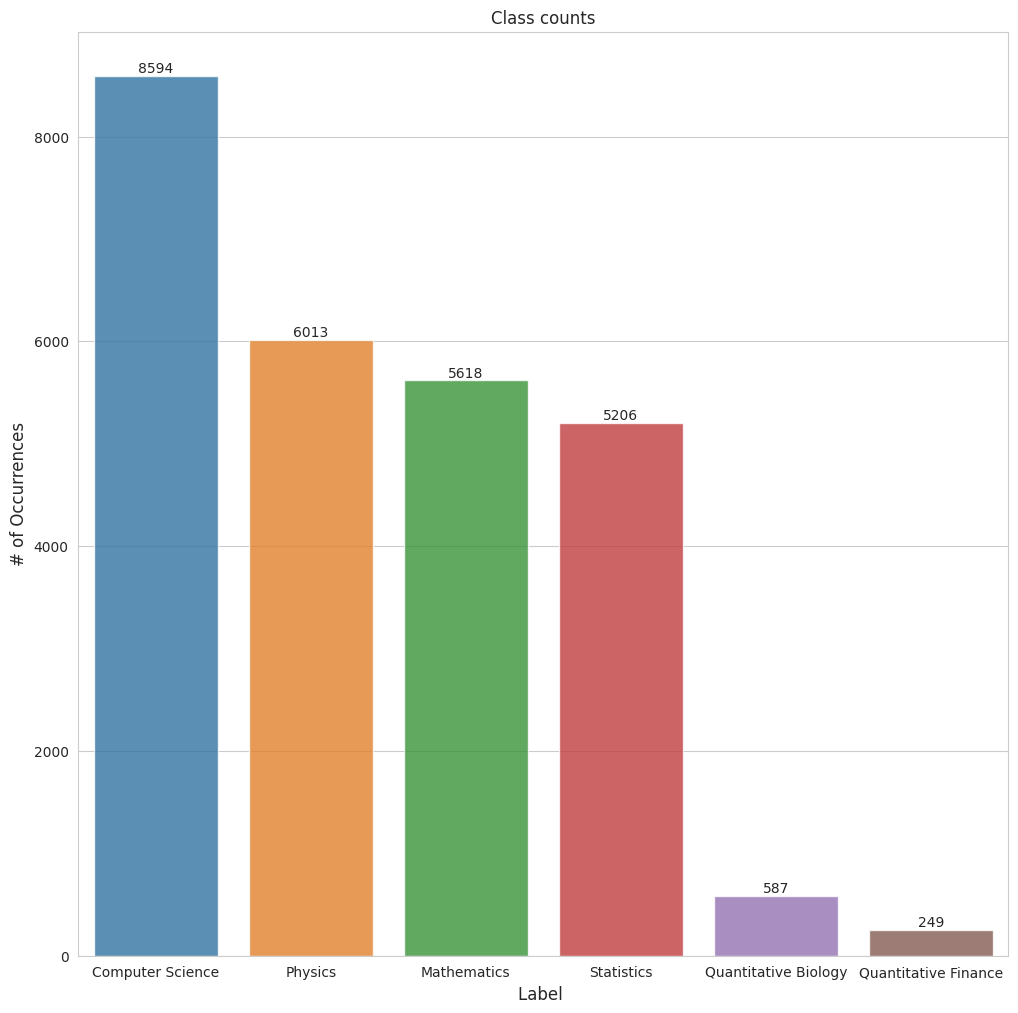

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

x=articles_train.iloc[:,3:].sum()
plt.figure(figsize=(12,12))
ax= sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("Class counts")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Label ', fontsize=12)

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

Berdasarkan output diatas:
- Kategori yang memiliki jumlah artikel terbanyak dalam dataset adalah kategori Computer Science, dengan total 8594 artikel
- Kategori yang memiliki jumlah artikel terendah adalah kategori Quantitative Finance, dengan total 249 artikel

In [ ]:
articles_train['Text'] = articles_train['TITLE'] + articles_train['ABSTRACT']
articles_test['Text'] = articles_test['TITLE'] + articles_test['ABSTRACT']

In [ ]:
articles_train.TITLE[1]

'Rotation Invariance Neural Network'

In [ ]:
articles_train.ABSTRACT[1]

'  Rotation invariance and translation invariance have great values in image\nrecognition tasks. In this paper, we bring a new architecture in convolutional\nneural network (CNN) named cyclic convolutional layer to achieve rotation\ninvariance in 2-D symbol recognition. We can also get the position and\norientation of the 2-D symbol by the network to achieve detection purpose for\nmultiple non-overlap target. Last but not least, this architecture can achieve\none-shot learning in some cases using those invariance.\n'

In [ ]:
articles_train.Text[1]

'Rotation Invariance Neural Network  Rotation invariance and translation invariance have great values in image\nrecognition tasks. In this paper, we bring a new architecture in convolutional\nneural network (CNN) named cyclic convolutional layer to achieve rotation\ninvariance in 2-D symbol recognition. We can also get the position and\norientation of the 2-D symbol by the network to achieve detection purpose for\nmultiple non-overlap target. Last but not least, this architecture can achieve\none-shot learning in some cases using those invariance.\n'

In [ ]:
articles_train['Target'] = articles_train[['Computer Science','Physics','Mathematics','Statistics','Quantitative Biology','Quantitative Finance']].values.tolist()

In [ ]:
articles_train.Target[1]

[1, 0, 0, 0, 0, 0]

Text: Column 'TITLE', 'ABSTRACT' <br>
Topic: Column 'Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', and 'Quantitative Finance <br>

Gabungkan kolom Title dan Abstract menjadi 1 kolom Text untuk dipakai. Kolom kategori juga akan digabungkan menjadi 1 kolom Topic.

#### Preprocessing and Cleansing Text

Langkah preprocessing dan cleansing meliputi:
- lowercase
- remove "\n" in text
- remove punctuations and symbols
- remove numbers
- remove single characters
- remove multiple whitespaces

In [ ]:
df=articles_train[['Text','Target']].copy()

In [ ]:
import re
import string

def data_cleansing(df):
    clean_data = df
    # Make Lowercase
    clean_data.Text = df.Text.str.lower()
    # Remove \n in Text
    clean_data.Text = [re.sub(r'\n', ' ', i) for i in clean_data.Text]
    # Punctuations
    clean_data.Text = [word.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation))) for word in clean_data.Text]
    # Remove Numbers
    clean_data.Text = [re.sub(r"\d+","", i) for i in clean_data.Text]
    # Remove Single Characters
    clean_data.Text = [re.sub(r'(?:^| )\w(?:$| )', ' ', i).strip() for i in clean_data.Text]
    # Remove Multiple Whitespaces
    clean_data.Text = [re.sub(r"\s+"," ", i) for i in clean_data.Text]

    return clean_data

In [ ]:
df = data_cleansing(df)
test_df = data_cleansing(articles_test)

In [ ]:
df.Text[22]

'fault detection and isolation tools fditools user guide the fault detection and isolation tools fditools is collection of matlab functions for the analysis and solution of fault detection and model detection problems the implemented functions are based on the computational procedures described in the chapters and of the book varga solving fault diagnosis problems linear synthesis techniques springer this document is the user guide for the version of fditools first we present the mathematical background for solving several basic exact and approximate synthesis problems of fault detection filters and model detection filters then we give in depth information on the command syntax of the main analysis and synthesis functions several examples illustrate the use of the main functions of fditools'

In [ ]:
test_df.Text[22]

'towards binary valued gates for robust lstm training long short term memory lstm is one of the most widely used recurrent structures in sequence modeling it aims to use gates to control information flow g whether to skip some information or not in the recurrent computations although its practical implementation based on soft gates only partially achieves this goal in this paper we propose new way for lstm training which pushes the output values of the gates towards or by doing so we can better control the information flow the gates are mostly open or closed instead of in middle state which makes the results more interpretable empirical studies show that although it seems that we restrict the model capacity there is no performance drop we achieve better or comparable performances due to its better generalization ability the outputs of gates are not sensitive to their inputs we can easily compress the lstm unit in multiple ways g low rank approximation and low precision approximation th

##### Remove Stopwords

Penghapusan stopwords karena dianggap tidak memiliki makna.

In [ ]:
! pip install nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
list_stopwords = set(stopwords.words('english'))

In [ ]:
df.Text = df.Text.apply(lambda x: ' '.join([item for item in x.split() if item not in list_stopwords]))
df.Text[22]

'fault detection isolation tools fditools user guide fault detection isolation tools fditools collection matlab functions analysis solution fault detection model detection problems implemented functions based computational procedures described chapters book varga solving fault diagnosis problems linear synthesis techniques springer document user guide version fditools first present mathematical background solving several basic exact approximate synthesis problems fault detection filters model detection filters give depth information command syntax main analysis synthesis functions several examples illustrate use main functions fditools'

##### Lemmatization

Mengubah kata-kata menjadi kata dasar.

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df.Text = df.Text.apply(lambda x: ' '.join([lemmatizer.lemmatize(y) for y in x.split()]))
df.Text[22]

'fault detection isolation tool fditools user guide fault detection isolation tool fditools collection matlab function analysis solution fault detection model detection problem implemented function based computational procedure described chapter book varga solving fault diagnosis problem linear synthesis technique springer document user guide version fditools first present mathematical background solving several basic exact approximate synthesis problem fault detection filter model detection filter give depth information command syntax main analysis synthesis function several example illustrate use main function fditools'

#### Modelling

Model yang akan digunakan adalah model pretraining BERT.

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 116.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
import transformers
from transformers import BertTokenizer, BertForSequenceClassification, AdamW

In [ ]:
MAX_LEN = 64
TRAIN_BATCH_SIZE = 64
TEST_BATCH_SIZE = 64
EPOCHS = 5
LEARNING_RATE = 1e-05
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Dataset training akan dibagi dengan ratio 8:2 menjadi training dataset dan validation dataset. Setelah itu, dataset teks akan diubah menjadi token dan akan diubah menjadi angka dengan proses vektorisasi.

In [ ]:
from torch.utils.data import Dataset
class CustomDataset(Dataset):

    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.title = dataframe['Text']
        self.targets = self.data.Target
        self.max_len = max_len

    def __len__(self):
        return len(self.title)

    def __getitem__(self, index):
        title = str(self.title[index])
        title = " ".join(title.split())

        inputs = self.tokenizer.encode_plus(
            title,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_token_type_ids=True,
            truncation=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

In [ ]:
train_dataset, valid_dataset = train_test_split(df, train_size=0.8, random_state=42)
valid_dataset = valid_dataset.reset_index(drop=True)
train_dataset = train_dataset.reset_index(drop=True)


print("FULL Dataset: {}".format(df.shape))
print("TRAIN Dataset: {}".format(train_dataset.shape))
print("TEST Dataset: {}".format(valid_dataset.shape))

training_set = CustomDataset(train_dataset, tokenizer, MAX_LEN)
validation_set = CustomDataset(valid_dataset, tokenizer, MAX_LEN)

FULL Dataset: (20972, 2)
TRAIN Dataset: (16777, 2)
TEST Dataset: (4195, 2)


In [ ]:
from torch.utils.data import DataLoader
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

valid_params = {'batch_size': TEST_BATCH_SIZE,
                'shuffle': False,
                'num_workers': 0
                }

training_loader = DataLoader(training_set, **train_params)
validation_loader = DataLoader(validation_set, **valid_params)

Dataset pada sebelumnya akan dibuat menjadi data loader class agar dapat diolah dengan lebih efisien. Pada arsitektur modelnya, akan digunakan model pretraining BERT Base Uncased dan ditambahkan layer tambahan untuk menyelesaikan kasus multilabel text classification.

In [ ]:
import transformers
class BERTClass(torch.nn.Module):
    def __init__(self):
        super(BERTClass, self).__init__()
        self.l1 = transformers.BertModel.from_pretrained('bert-base-uncased')
        self.l2 = torch.nn.Dropout(0.3)
        self.l3 = torch.nn.Linear(768, 6)

    def forward(self, ids, mask, token_type_ids):
        _, output_1= self.l1(ids, attention_mask = mask, token_type_ids = token_type_ids, return_dict=False)
        output_2 = self.l2(output_1)
        output = self.l3(output_2)
        return output

model = BERTClass()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BERTClass(
  (l1): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=Tr

In [ ]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

In [ ]:
def load_ckp(checkpoint_fpath, model, optimizer):
    """
    checkpoint_path: path to save checkpoint
    model: model that we want to load checkpoint parameters into
    optimizer: optimizer we defined in previous training
    """
    # load check point
    checkpoint = torch.load(checkpoint_fpath)
    # initialize state_dict from checkpoint to model
    model.load_state_dict(checkpoint['state_dict'])
    # initialize optimizer from checkpoint to optimizer
    optimizer.load_state_dict(checkpoint['optimizer'])
    # initialize valid_loss_min from checkpoint to valid_loss_min
    valid_loss_min = checkpoint['valid_loss_min']
    # return model, optimizer, epoch value, min validation loss
    return model, optimizer, checkpoint['epoch'], valid_loss_min.item()

In [ ]:
import shutil, sys
def save_ckp(state, is_best, checkpoint_path, best_model_path):
    """
    state: checkpoint we want to save
    is_best: is this the best checkpoint; min validation loss
    checkpoint_path: path to save checkpoint
    best_model_path: path to save best model
    """
    f_path = checkpoint_path
    # save checkpoint data to the path given, checkpoint_path
    torch.save(state, f_path)
    # if it is a best model, min validation loss
    if is_best:
        best_fpath = best_model_path
        # copy that checkpoint file to best path given, best_model_path
        shutil.copyfile(f_path, best_fpath)

In [ ]:
val_targets=[]
val_outputs=[]

In [ ]:
def train_model(start_epochs,  n_epochs, valid_loss_min_input,
                training_loader, validation_loader, model,
                optimizer):

  # initialize tracker for minimum validation loss
  valid_loss_min = valid_loss_min_input


  for epoch in range(start_epochs, n_epochs+1):
    train_loss = 0
    valid_loss = 0

    model.train()
    print('############# Epoch {}: Training Start   #############'.format(epoch))
    for batch_idx, data in enumerate(training_loader):
        #print('yyy epoch', batch_idx)
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)

        outputs = model(ids, mask, token_type_ids)

        optimizer.zero_grad()
        loss = loss_fn(outputs, targets)
        #if batch_idx%5000==0:
         #   print(f'Epoch: {epoch}, Training Loss:  {loss.item()}')

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #print('before loss data in training', loss.item(), train_loss)
        train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.item() - train_loss))
        #print('after loss data in training', loss.item(), train_loss)

    print('############# Epoch {}: Training End     #############'.format(epoch))

    print('############# Epoch {}: Validation Start   #############'.format(epoch))
    ######################
    # validate the model #
    ######################

    model.eval()

    with torch.no_grad():
      for batch_idx, data in enumerate(validation_loader, 0):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask, token_type_ids)

            loss = loss_fn(outputs, targets)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.item() - valid_loss))
            val_targets.extend(targets.cpu().detach().numpy().tolist())
            val_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())

      print('############# Epoch {}: Validation End     #############'.format(epoch))
      # calculate average losses
      #print('before cal avg train loss', train_loss)
      train_loss = train_loss/len(training_loader)
      valid_loss = valid_loss/len(validation_loader)
      # print training/validation statistics
      print('Epoch: {} \tAvgerage Training Loss: {:.6f} \tAverage Validation Loss: {:.6f}'.format(
            epoch,
            train_loss,
            valid_loss
            ))

    print('############# Epoch {}  Done   #############\n'.format(epoch))


  return model

In [ ]:
import numpy as np
trained_model = train_model(1, 5, np.Inf, training_loader, validation_loader, model,
                      optimizer)

############# Epoch 1: Training Start   #############
############# Epoch 1: Training End     #############
############# Epoch 1: Validation Start   #############
############# Epoch 1: Validation End     #############
Epoch: 1 	Avgerage Training Loss: 0.001226 	Average Validation Loss: 0.003562
############# Epoch 1  Done   #############

############# Epoch 2: Training Start   #############
############# Epoch 2: Training End     #############
############# Epoch 2: Validation Start   #############
############# Epoch 2: Validation End     #############
Epoch: 2 	Avgerage Training Loss: 0.000808 	Average Validation Loss: 0.003069
############# Epoch 2  Done   #############

############# Epoch 3: Training Start   #############
############# Epoch 3: Training End     #############
############# Epoch 3: Validation Start   #############
############# Epoch 3: Validation End     #############
Epoch: 3 	Avgerage Training Loss: 0.000693 	Average Validation Loss: 0.002923
############# Ep

Training dari model 5 epoch berhasil dengan rata-rata loss training 0.000551 dan rata-rata loss validation 0.002839.

In [ ]:
val_preds = (np.array(val_outputs) > 0.5).astype(int)
val_preds

array([[1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(val_targets, val_preds)
f1_score_micro = f1_score(val_targets, val_preds, average='micro')
f1_score_macro = f1_score(val_targets, val_preds, average='macro')
print(f"Accuracy Score = {accuracy}")
print(f"F1 Score (Micro) = {f1_score_micro}")
print(f"F1 Score (Macro) = {f1_score_macro}")

Accuracy Score = 0.6589749702026222
F1 Score (Micro) = 0.8060925600468658
F1 Score (Macro) = 0.6970793039108824


Akurasi yang didapatkan dari validation dataset dengan model BERT di atas adalah sekitar 65,9%, f1 score micro 80.61%, dan f1 score macro 69.7%.

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix as mcm, classification_report

In [ ]:
cm_labels = ['Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance']

cm = mcm(val_targets, val_preds)

In [ ]:
print(classification_report(val_targets, val_preds))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      8460
           1       0.91      0.83      0.87      6130
           2       0.84      0.75      0.79      5750
           3       0.79      0.71      0.75      5345
           4       0.58      0.27      0.36       610
           5       0.95      0.41      0.58       225

   micro avg       0.84      0.78      0.81     26520
   macro avg       0.81      0.64      0.70     26520
weighted avg       0.83      0.78      0.80     26520
 samples avg       0.84      0.82      0.81     26520



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    axes.set_xlabel('True label')
    axes.set_ylabel('Predicted label')
    axes.set_title("Confusion Matrix for the class - " + class_label)

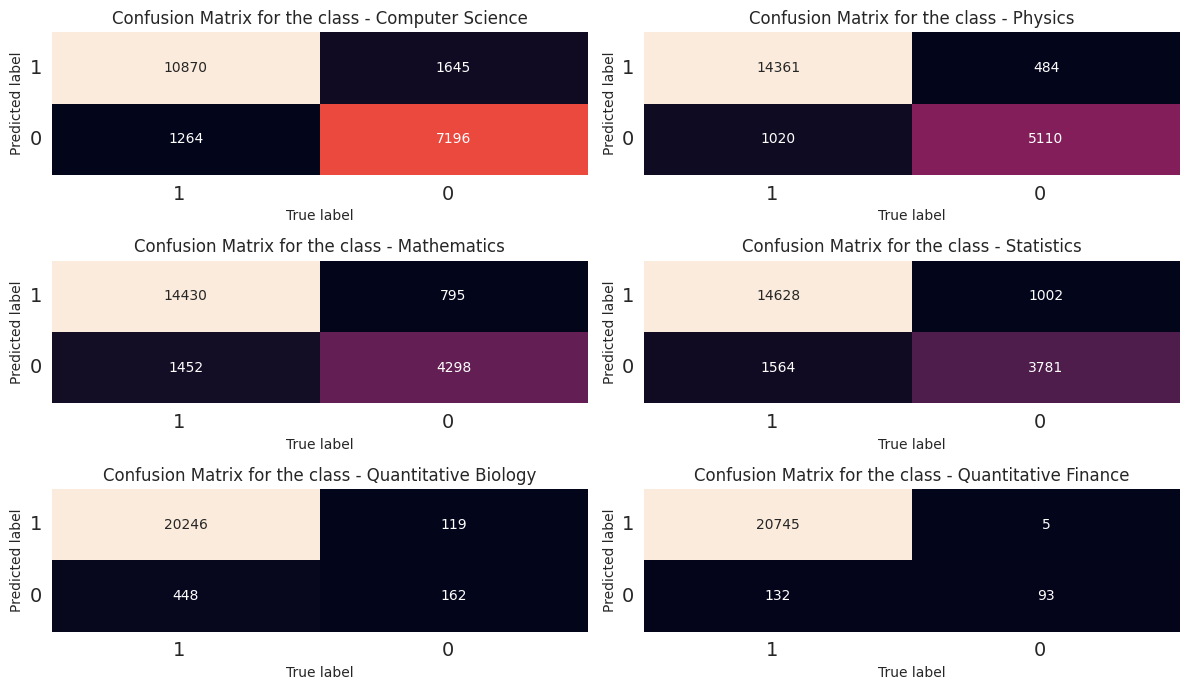

In [ ]:
#print_confusion_matrix(mcm(targets, val_preds),class_label=labels, class_names=labels)
sns.set_style("whitegrid")
fig, ax = plt.subplots(3, 2, figsize=(12, 7))
for axes, cfs_matrix, label in zip(ax.flatten(), cm, cm_labels):
  print_confusion_matrix(cfs_matrix, axes, label, ["1", "0"])

fig.tight_layout()
plt.show()

Dari hasil confusion matrix diatas dapat dilihat dari nilai True Positive untuk masing-masing topik.
- Computer Science terdapat 10891 jumlah true positive
- Physics terdapat 14338 jumlah true positive
- Mathematics terdapat 14534 jumlah true positive
- Statistics terdapat 14457 jumlah true positive
- Quantitative biology terdapat 20254 jumlah true positive
- Quantitative finance terdapat 20744 jumlah true positive.

Sehingga dapat disimpulkan bahwa model memiliki kemampuan yang cukup baik dalam mengklasifikasi artikel sesuai dengan topik.

#### Model Testing

In [ ]:
class PrepForPredictionDataset(Dataset):

    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.title = dataframe['TITLE']
        #self.targets = self.data.target_list
        self.max_len = max_len

    def __len__(self):
        return len(self.title)

    def __getitem__(self, index):
        title = str(self.title[index])
        title = " ".join(title.split())

        inputs = self.tokenizer.encode_plus(
            title,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_token_type_ids=True,
            truncation=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
           # 'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

In [ ]:
testing_set = PrepForPredictionDataset(test_df, tokenizer, MAX_LEN)
testing_set[0]

{'ids': tensor([  101,  2701,  1011,  2433, 14785, 16593,  1999, 13091,  1011, 13433,
         24077,  8185,  5387,  3989,   102,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0]),
 'mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}

In [ ]:
testing_loader = DataLoader(testing_set, **valid_params)

In [ ]:
def do_prediction(loader):
    model.eval()

    fin_outputs=[]
    with torch.no_grad():
        for _, data in enumerate(loader):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            #targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask, token_type_ids)
            #fin_targets.extend(targets.cpu().detach().numpy().tolist())
            fin_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
    return fin_outputs

In [ ]:
pred_outputs = do_prediction(testing_loader)

In [ ]:
pred_outputs = (np.array(pred_outputs) >= 0.5).astype(int)

In [ ]:
pred_outputs

array([[0, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 0, 0]])

In [ ]:
preds_df = pd.DataFrame(pred_outputs, columns =['Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance'])
preds_df.head()

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,0,0,1,1,0,0
1,0,1,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [ ]:
df_concat = pd.concat([test_df, preds_df], axis=1)
df_concat.head()

,ID,TITLE,ABSTRACT,Text,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...,closed form marginal likelihood in gamma poiss...,0,0,1,1,0,0
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...,laboratory mid ir spectra of equilibrated and ...,0,1,0,0,0,0
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...,case for static amsdu aggregation in wlans fra...,1,0,0,0,0,0
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...,the gaia eso survey the inner disk intermediat...,0,1,0,0,0,0
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...,witness functions versus interpretation functi...,1,0,0,0,0,0


Setelah dilakukan model pada dataset testing didapatkan output seperti gambar diatas, dapat dilihat bahwa tiap variabel Title, Abstract, dan Text dapat secara langsung dikelompokkan berdasarkan kategorinya. Apabila pada tabel kategori bernilai 1 maka termasuk ke dalam kategorinya, dan jika bernilai 0 maka tidak termasuk kedalam kategorinya.

###Documentation

Link Video: https://youtu.be/rZ1WJut05pU